# 11/2021 Questions

This notebook will track progress on practice questions that are sent by the InterviewQs website in November 2021. 

<hr style="border:1px solid black"> </hr>

## 11/29 Question TO ANSWER

An insurance company classifies its customers into 3 categories: below average, average, and above average. No one moves more than one state at a time.


    
For example, a customer cannot move from below average to above average or from above average to below average in a given period. After a given period, we notice that:
    


    
40% of those in the below average category become average

    
30% of those in the average category become above average

    
10% of those in the average category become below average

    
20% of those in the above average category are downgraded to average

    

    

    
Given the above:
    


    
Can you write the transition matrix for the model?

    
What is the limiting fraction of drivers in each of these categories? (e.g. find the steady state)

    

    
    

    
Hint: It might be helpful to start with building a state transition diagram to depict a Markov chain for the different states a customer can move to given their current state.



<hr style="border:1px solid black"> </hr>

## 11/26 Question

Suppose an individual is taxed 30% if earnings for a given week are >= 2,000. If earnings land < 2,000 for the week, the individual is taxed at a lower rate of 15%.

Write a function using Python to calculate both the pre-tax and post-tax earnings for a given individual, with the ability to feed in the hourly wage and the weekly hours as inputs. 

For example, if an individual earns 55/hour and works for 40 hours, the function should return: 
    
Pre-tax earnings were 55*40 = 2,200 for the week. 

Post-tax earnings were 2,200*.7 (since we fall in higher tax bracket here) = 1,540 for the week

### Approach

Based on the prompt, I will write a function to perform the desired calculation. The function will:
- take in hourly wage and hours worked that week
- determine the pre-tax earnings by multiplying the above two values together
- determine the tax rate based on the threshold of $2000 noted in the prompt
- determine post-tax earnings by multiplying pre-tax values by tax rate percentage
- print the values for pre and post tax earnings as shown in the prompt

In [1]:
#function to perform above steps
def earnings_calculator(wage, hours):
    pre_tax_earnings =wage*hours
    if pre_tax_earnings>=2000:
        taxed_pct=0.7
    else:
        taxed_pct=0.85
    post_tax_earnings = pre_tax_earnings*taxed_pct
    print(f'Pre-tax earnings were {wage}*{hours} = ${pre_tax_earnings} for the week.')
    print(f'Post-tax earnings were ${pre_tax_earnings}*{taxed_pct} = ${post_tax_earnings} for the week.')

In [2]:
#example call of function
earnings_calculator(55,40)

Pre-tax earnings were 55*40 = $2200 for the week.
Post-tax earnings were $2200*0.7 = $1540.0 for the week.


<hr style="border:1px solid black"> </hr>

## 11/24 Question

Suppose you’re an analyst for an e-commerce store. You’re trying to identify the top selling products in Q4 2017 by region, and you have 2 tables that you can query: 


    
Table: all_products
    
|Column Name|	Data Type|	Description|
|---|---|---|
|product_id	|integer	|id of the product|
|product_name	|string	|name of the product |
|sku	|integer	|universal stock keeping unit number|
|distributor_id	|integer	|id for distributor|
   
Table: orders

|Column Name|	Data Type|	Description|
|---|---|---|
|date	|string|	format is "YYYY-MM-DD"|
|user_id|	integer	|id of purchaser|
|order_id	|integer|	id of order number|
|product_id	|integer	|id of product|
|no_units	|integer	|number of units sold in the order|
|price	|integer	|price per item|
|shipping_id|	integer	|id of shipment|
|region	|string|	region being shipped to|

    

    
Using the tables above, write a SQL query to find the top 5 selling products (in terms of total units sold) by region in Q4 of 2017. Include both the distributor id as well as the name of the product in your results.

### Approach

To do the above query I will create a subquery, within which I will:
- join the above tables on product_id
- group by region and product_name so these appear as requested
- filter by Q4 2017 dates
- order by region and row ascending no so that data is ordered and the higher volume products get the lower numbers
- select region, product_name, sum of no_units, row number based on region and sum of units

The above will aggregate the data as requested, and provide a row # that we can filter on. Outside of this subquery, I will then:
- select the relevant rows
- filter by row <=5 to get the top 5 products only for each region
- order by region and rows DESC so the top rows get shown first

select region, product_name, total_units from ( <br>

select region, product_name, sum(no_units) as total_units, ROW_NUMBER() OVER(PARTITION BY region ORDER BY sum(no_units) ASC) 
  AS rows <br>
FROM orders a join all_products b <br>
ON a.product_id=b.product_id <br>
GROUP BY region, product_name <br>
HAVING date>= "2017-10-01" AND date <="2017-12-31" <br>
ORDER BY region, rows asc) <br>

where rows<=5 <br>
ORDER BY region, rows DESC <br>

<hr style="border:1px solid black"> </hr>

## 11/22 Question TO ANSWER

uppose you're given the following information about a population and its wealth distribution:


    

    
Population size: 2500

    
Mean income (in USD, thousands): 50

    
Standard deviation of income (in USD, thousands): 12.5

    
The population wealth is initially normally distributed

    

    
Additionally, you're told that economic transactions occur randomly between two individuals in the population. In a transaction, two parties come together and there is an exchange of wealth. For the purposes of this question, the transactions can be modeled in the following way:


    

    
Two individuals come together at random

    
When they interact, their wealth is put into a pot, and is then split randomly and uniformly between the two parties

    

    
Given this information, write a simulation to show how the wealth of the population will change over time. You can simulate 50 time steps (or transactions per individual).

<hr style="border:1px solid black"> </hr>

## 11/19 Question

Suppose you're trying to optimize a mailing campaign where physical mail is sent to potential customers. There are two options to send advertising mail, either first class or third class. First-class costs 0.50 per parcel with a delivery rate of 99% and third-class costs 0.35 per parcel with a delivery rate of 65%. Third-class mail also receives a volume discount, if a batch of parcels is greater than 500, for first 500 are 0.35 and anything additional costs 0.32 per parcel.

Questions:        

Which option is the best for the company?

Assume our goal is to reach as many people with a cap of $1000, which option would be the best?

Assume our goal is to reach 100 people, what option is best?

## Part 1

The best option for the company will depend on how many people it would like to reach. We need to find the breakeven points, where it would cost the same to reach x people with first class envelopes and third class envelopes. 

There will be two major breakeven points:
- initially, third class mail will be cheaper because the cost is less and the delivery rate factor isn't large enough to outweigh the cost difference between the two types of mail
- as the desired people to reach increases, the delivery rate will have larger impact. The increased number of envelopes needed to deliver to x people will lead to higher cost for third class mail, and thus first class mail will be cheaper
- finally, after 500 envelopes the cost for third class mail will decrease. this will eventually lead to lower cost for third class envelopes after the final breakeven point

To find the breakeven points, I will write a function to calculate the cost to send an envelope to x people via both methods. The function will:
- initiate a 'people to reach' variable at 1. This will be increased until we reach the desired amount of breakeven points
- calculate the cost of reaching that many people via first class and third class mail
- When first and third class costs are even, append the corresponding value of 'people to reach' to an array for tracking purposes. These are the breakeven points in terms of desired people to reach.
- When we have the desired amount of breakeven points, the loop will end
- return the array so we know where the breakeven points are.

### Result

As shown below:

__For reaching up to 13 people, it is more cost effective to use third-class mail. For reaching 14-1170 people, it is more cost effective to use first-class mail. For reaching over 1170 people, using third class mail will be more cost effective.__

In [61]:
import math
def mail_breakeven_points():
    breakeven_points = []
    people_to_reach=1
    while len(breakeven_points)<3:
        first_class_envelopes_to_send = math.ceil(people_to_reach/0.99)
        third_class_envelopes_to_send = math.ceil(people_to_reach/0.65)
        first_class_cost = first_class_envelopes_to_send*0.5
        if third_class_envelopes_to_send<=500:
            third_class_cost = third_class_envelopes_to_send*0.35
        else:
            third_class_cost = 500*0.35 + (third_class_envelopes_to_send-500)*0.32
        if third_class_cost==first_class_cost:
            breakeven_points.append(people_to_reach)
        people_to_reach+=1
    return breakeven_points

In [62]:
mail_breakeven_points()

[6, 13, 1170]

As shown in the above, there are three breakeven points: at 6,13, and 1170 people to reach. Upon further analysis, the first breakeven point at 6 is a slight misnomer. Both before and after this point, third-class mail is cheaper to use. The math just worked out that for 6, the cost was the same for both mail types. Since third class mail is cheaper or equal to cost for first class mail up to 13 envelopes, for all intents and purposes the following is true:

__For reaching up to 13 people, it is more cost effective to use third-class mail. For reaching 14-1170 people, it is more cost effective to use first-class mail. For reaching over 1170 people, using third class mail will be more cost effective.__

## Part 2

With a cap of \$1000, we can find the number of people that can be reached with first and third class mail. We do this by setting the cost cap equal to (delivery cost)*x, where x is the number of people reached. We would then multiply x by the delivery rate to find the total people reached:

For first class, this would mean: \$1000 = 0.5x -> x = 2000 envelopes sent. With a delivery rate of 99%, 2000 x 0.99 = 1980 people reached.

For third class, we break this into two segments since there are different cost for sending more than 500 envelopes. To send 500 envelopes would cost: 500 x 0.35 per envelope = 175. So we would send 500 envelopes for 175, leaving 825 remaining.

With the 825 we follow the same math as for first class mail: 825 = 0.32x -> x = 2578 envelopes sent.

Adding the 2587 and 500, we get 3078 envelopes sent. With a delivery rate of 0.65 we get: 3078 x 0.65 = 2000 people reached.

__In this case, 2000 people reached with third class is greater than 1980 reached with first class mail. So with \$1000 it would be better to use third class mail.__

### Part 3

Using the logic from part 1, we know that 100 is in the range for which first class mail is cheaper. To formally calculate this out we can explain as follows:

If the goal is to reach 100 people, we need to find out how many envelopes it would take to reach those people given our delivery rates. We do this by dividing the desired number of poeple to reach by the delivery rate.

For first class: 100/0.99 = 101.01, rounded up to 102 since we can't send 0.01 envelopes.

For third class: 100/0.65 = 153.86, rounded up to 154

The cost for first class mail would be the number of envelopes multiplied by cost per envelope: 102 x $0.5/envelope = $51.

The cost for third class mail would be the number of envelopes multiplied by cost per envelope: 154 x $0.35/envelope = $53.9.

__As shown above, to reach 100 people it would be more cost effective to use first class mail.__

<hr style="border:1px solid black"> </hr>

## 11/17 Question

Suppose you're given a matrix of 1s and 0s that represents a map of rivers. You can assume that the grid cells in your map are only connected horizontally and vertically (e.g. no diagonal connections). You can assume that 1 represents water (your river) and 0 represents land/your river bank. Each cell has a length of 1 and is square in your map. Given this, write code to determine the perimeter of your river.


    
Examples:


    
    
Input: [[1,0]] 
    

Output: 4
    


    

Input: [[1,0,1],
    

        [1,1,1]] 
    

Output: 12

### Approach

For this problem I will initiate a "perimeter" variable to count the total perimeter of the river, and then run a for loop. This for loop will go through each cell in the grid and do the following:
- if the cell value is not a river, do nothing. Otherwise do the below
- initially add 4 to the perimeter variable, since that is the max number of sides around a river that could be land
- search each border around the cell and check if that border is also a river, decrease the perimeter value by 1
- return the final value of perimeter as the result

In [ ]:
def islandPerimeter(self, grid):
        perimeter=0
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j]:
                    perimeter+=4
                    if 0<=i<=len(grid)-1 and 0<=j-1<=len(grid[0])-1:
                        perimeter-=grid[i][j-1]
                    if 0<=i<=len(grid)-1 and 0<=j+1<=len(grid[0])-1  :
                        perimeter-=grid[i][j+1]
                    if 0<=i-1<=len(grid)-1 and 0<=j<=len(grid[0])-1  :
                        perimeter-=grid[i-1][j]
                    if 0<=i+1<=len(grid)-1 and 0<=j<=len(grid[0])-1  : 
                        perimeter-=grid[i+1][j]
        return perimeter

<hr style="border:1px solid black"> </hr>

## 11/15 Question

You are given the below tables, showing student attendance information as well as the grade level (grades 7-8) that each student is in. The columns are labeled in such a way that you should be able to interpret what each field is showing.

student_attendance_log

|student_id |attendance_status|
|---|---|
|57510 |Present|
|57509	|Present|
|57508	|Tardy|
|57507	|Absent|
|57506	|Present|
|57505	|Present|
|57504	|Present|
|57503	|Tardy|
|57501	|Absent|
|57500	|Present|
|57499	|Tardy|
|57498	|Absent|
|57497	|Present|
    
    
student_info

|student_id|grade_level|
|---|---|
|57510	|7|
|57509	|7|
|57508	|8|
|57507	|8|
|57506	|7|
|57505	|7|
|57504	|8|
|57503	|8|
|57501	|8|
|57500	|8|
|57499	|7|
|57498	|7|
|57497	|8|
    
    
    

    
Using the tables above, write a SQL query to return the % of students by grade that are either tardy or absent in your attendance log. As shown in the tables, each student id is unique and exists across both tables.


    
Your output should return the following columns:


    
|grade_level |	percent_absent_tardy	|total_num_students|
|---|---|---|
|7	|0.XX	|N|
|8	|0.YY	|N|

### Approach
I will:
- join the two provided tables on student_id
- group by grade level
- display the grade level values
- create and show a column that sums the total amount of tardy and absent student counts and divide by total students in the grade to get percent_absent_tardy
- create and show the count the total number of students in the grade to get total_num_students

select grade_level,round(sum(case when attendance_status in ('Tardy', 'Absent') Then 1 else 0 end)/(count(grade_level)*1.00),2) percent_absent_tardy,  count(grade_level) as total_num_students <br>
from student_attendace_log a join student_info b <br>
ON a.student_id=b.student_id <br>
GROUP BY grade_level

<hr style="border:1px solid black"> </hr>

## 11/12 Question

You are given the following dataset, containing information on baby names from the U.S. Social Security Administration.

Using the dataset, write code to find the following:
    
Number of unique names across the dataset, split by both # of unique male/female names

Top 10 most popular male and female names, along with their associated counts

The top 10 most popular names from 2010+, with an associated plot to show the relative growth between names

### Approach
I will break the above into the three tasks. 

To tackle task 1, finding the # of unique baby names I will:
- create a dataframe with only a particular gender's name values
- count the number of unique values in the name column

For task 2, I will:
- create a dataframe with only a particular gender's name values
- group that df by name
- perform an aggregate on the df, summing up the "count" column
- sort the resultant df by count, so top 10 results are at the top
- display the top 10 names and corresponding counts

For task 3, I will:
- re-calculate the top 10 names as done in step 2, this time with a date filter going >=2010 as specified
- create a separate df that only contains the top names and isn't grouped by year, so that yearly counts can be plotted
- plot the year and count values in the resultant df, for each of the top 10 names

For ease of use, I will combine the above steps into one function that can be used to find the desired results based on dataframe and gender inputs.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
    
baby_names = pd.read_csv('https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/ddi_baby_names.csv')
baby_names.head()

,year,name,gender,count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


In [125]:
def baby_name_stats(baby_names,gender):
    ##################################part 1
    if gender=="M":
        full_gender="male"
    else:
        full_gender="female"
    unique_names=baby_names[baby_names["gender"]==gender]["name"].nunique() #find unique number of name
    print(f'The number of unique {full_gender} names in this dataset is {unique_names}!\n') #print unique number of names
    
    ##################################part 2
    #create df that has the specified gender, group by name, aggregate the count col, sort by top count vals, and only display top 10 results
    top_ten_male_names_df=baby_names[baby_names["gender"]==gender].groupby(["name"]).agg("sum").sort_values("count", ascending=False).reset_index()[["name","count"]][0:10]
    
    #create list of top names from df
    top_ten_male_names=top_ten_male_names_df["name"]
    
    #print top names and associated counts
    print(f'The top 10 {full_gender} names in this dataset is\n{top_ten_male_names_df}!\n') 
    
    ##################################part 3
    #create df that has the specified gender and year limits, group by name, aggregate the count col, sort by top count vals, and only display top 10 results
    top_ten_male_names_2010_df=baby_names[(baby_names["gender"]==gender) & (baby_names["year"]>=2010)].groupby(["name"]).agg("sum").sort_values("count", ascending=False).reset_index()[["name","count"]][0:10]
    
    #create list of top names and counts from df
    top_ten_male_names_2010_list = top_ten_male_names_2010_df[["name", "count"]]
    
    #create new df with the specified gender, birth years, and names
    male_grouped_by_year = baby_names[(baby_names["name"].isin(top_ten_male_names_2010_list["name"])) & (baby_names["gender"]==gender) & (baby_names["year"]>=2010)]
    
    #print list of top names post 2010
    print(f'The top 10 {full_gender} names after 2010 in this dataset are:\n{top_ten_male_names_2010_list}\n')
    
    ##################################plot
    print("The trend of the above post-2010 baby names by year is:")
    sns.lineplot(data=male_grouped_by_year, x="year", y="count", hue="name")
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    

The number of unique male names in this dataset is 41475!

The top 10 male names in this dataset is
      name    count
0    James  5164280
1     John  5124817
2   Robert  4820129
3  Michael  4362731
4  William  4117369
5    David  3621322
6   Joseph  2613304
7  Richard  2565301
8  Charles  2392779
9   Thomas  2311849!

The top 10 male names after 2010 in this dataset are:
        name   count
0       Noah  163657
1       Liam  152994
2      Jacob  152020
3      Mason  146079
4    William  145893
5      Ethan  137512
6    Michael  134043
7  Alexander  130477
8      James  126060
9     Elijah  123151

The trend of the above post-2010 baby names by year is:


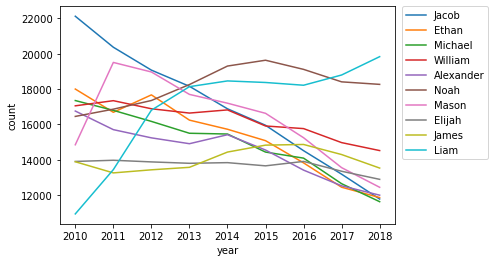

In [126]:
baby_name_stats(baby_names,"M")

The number of unique female names in this dataset is 67698!

The top 10 female names in this dataset is
        name    count
0       Mary  4125675
1  Elizabeth  1638349
2   Patricia  1572016
3   Jennifer  1467207
4      Linda  1452668
5    Barbara  1434397
6   Margaret  1248985
7      Susan  1121703
8    Dorothy  1107635
9      Sarah  1077746!

The top 10 female names after 2010 in this dataset are:
        name   count
0       Emma  177410
1     Sophia  166986
2     Olivia  165581
3   Isabella  156709
4        Ava  140979
5        Mia  116301
6    Abigail  109253
7      Emily  109149
8    Madison   91914
9  Charlotte   89043

The trend of the above post-2010 baby names by year is:


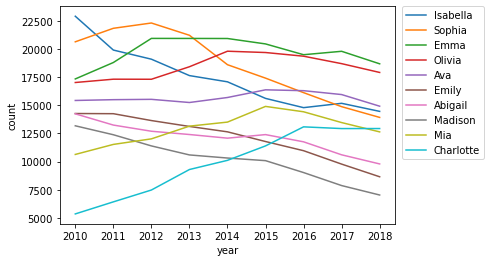

In [124]:
baby_name_stats(baby_names,"F")

<hr style="border:1px solid black"> </hr>

## 11/10 Question - TO ANSWER

Given the data table below, determine if there is a relationship between fitness level and smoking habits:

|Low fitness level |	Medium-low fitness level |	Medium-high fitness level |	High fitness level |
|---|---|---|---|
|Never smoked|	113	|113	|110	|159|
|Former smokers|	119	|135|	172	|190|
|1 to 9 cigarettes daily|	77	|91|	86|	65|
|10+ cigarettes daily|	181|	152|	124|	73|

You don't have to fully solve for the number here (that would be pretty time-intensive for an interview setting), but lay out the steps you would take to solve such a problem. 

<hr style="border:1px solid black"> </hr>

## 11/08 Question

Given an array and an integer A, find the maximum for each contiguous subarray of size A.

Input: array = [1, 2, 3, 1, 4, 5, 2, 3, 6], A = 3
Output: 3 3 4 5 5 5 6
    
Below is a more detailed walkthrough of what you should be trying to code, using the example above:
subarray 1 = [1, 2, 3, 1, 4, 5, 2, 3, 6]
maximum of subarray 1 = 3

subarray 2 = [1, 2, 3, 1, 4, 5, 2, 3, 6] 
maximum of subarray 2 = 3

subarray 3 = [1, 2, 3, 1, 4, 5, 2, 3, 6] 
maximum of subarray 3 = 4

Etc.

### Approach

To solve this problem I will write a function that will:
- initiate an array to store results
- define initial start and end points for the subarray
- create a for loop for to run through each subarray
- in the for loop, I will find the max value in the sub array, append that value to the results array, and increment the start and end vars
- return the final result array

In [13]:
def max_subarrays(array, A):
    res=[]
    start,end = 0, A
    for i in range(len(array)-A+1):
        res.append(max(array[start:end]))
        start,end=start+1, end+1
    return res
    

In [12]:
max_subarrays([1, 2, 3, 1, 4, 5, 2, 3, 6],3)

[1, 2, 3]
[2, 3, 1]
[3, 1, 4]
[1, 4, 5]
[4, 5, 2]
[5, 2, 3]
[2, 3, 6]


[3, 3, 4, 5, 5, 5, 6]

<hr style="border:1px solid black"> </hr>

## 11/05 question - TO ANSWER

Suppose you're working for Reddit as an analyst. Reddit is trying to optimize its server allocation per subreddit, and you've been tasked with figuring out how much comment activity happens once a post is published.
    


    
Use your intuition to select a timeframe to query the data, as well as how you would want to present this information to the partnering team. The solution will be a SQL query with assumptions that you would need to state if this were asked in an interview. You have the following tables:


    
Table: posts


    
|Column Name|	Data Type|	Description|
|---|---|---|
|id|	integer|	id of the post|
|publisher_id|	integer	|id the user posting|
|score|	integer|	score of the post|
|time|	integer|	post publish time in unix time|
|title|	string	|title of the post|
|deleted|	boolean|	is the post deleted?|
|dead|	boolean|	is the post active?|
|subreddit_id|	integer|	id of the subreddit|

Table: comments

|Column Name|	Data Type|	Description|
|---|---|---|
|id|	integer|	id of the comment|
|author_id|	integer|	id of the commenter|
|post_id|	integer|	id of the post the comment is nested under|
|parent_comment|	integer|	id of parent comment that comment is nested under|
|deleted|	integer|	is comment deleted?|

    

    
 Given the above, write a SQL query to highlight comment activity by subreddit. This problem is intended to test how you can think through vague/open-ended questions.